In [3]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import uuid
import os
import numpy as np
import cv2

models = [
  # "VGG-Face", # not good
  # "Facenet",  #not good 
  "Facenet512", 
  # "OpenFace", # not good according to docs
  # "DeepFace", 
  # "DeepID", 
  # "ArcFace", # not good 
  # "Dlib", 
  # "SFace",
]

In [ ]:


res = DeepFace.analyze(r"C:\Users\meet2\Downloads\484449ccacee9b2311f645090b899d68.jpg")

res

[                                            identity  source_x  source_y  \
0  C:\Users\meet2\Downloads\imgs2\anushka/1084-an...       262        27   
1  C:\Users\meet2\Downloads\imgs2\anushka/0143911...       262        27   
2  C:\Users\meet2\Downloads\imgs2\anushka/anushka...       262        27   
3  C:\Users\meet2\Downloads\imgs2\anushka/382c6d1...       262        27   

   source_w  source_h  Facenet512_cosine  
0        57        71           0.202815  
1        57        71           0.207693  
2        57        71           0.225121  
3        57        71           0.226814  , Empty DataFrame
Columns: [identity, source_x, source_y, source_w, source_h, Facenet512_cosine]
Index: [],                                             identity  source_x  source_y  \
0  C:\Users\meet2\Downloads\imgs2\alia/a3c0a69bf5...        51        31   
1  C:\Users\meet2\Downloads\imgs2\alia/images-_1_...        51        31   

   source_w  source_h  Facenet512_cosine  
0        69        94   

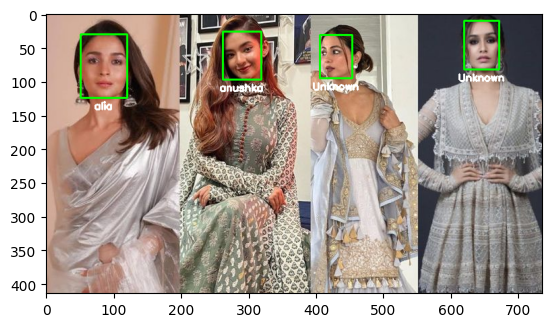

In [5]:
def TrainModel(path):
    # Delete previous model
    try:
        os.remove(os.path.join(path,'representations_facenet512.pkl'))
    except:
        pass

    # Train the model
    DeepFace.find(
        # img_path = r"C:\Users\meet2\Downloads\mix.jpg",
        # img_path = r"C:\Users\meet2\Downloads\aa.webp",
        # img_path = r"C:\Users\meet2\Downloads\aliag.jpg",
        img_path = np.zeros((100, 100, 3), dtype=np.uint8),
        # img_path = r"C:\Users\meet2\Downloads\ks.jpg",
        # img_path = r"C:\Users\meet2\Downloads\ak.webp",
        # img_path = r"C:\Users\meet2\Downloads\484449ccacee9b2311f645090b899d68.jpg",
        # img_path = r"C:\Users\meet2\Downloads\3.jpg",
        # img_path = r"C:\Users\meet2\Downloads\rk.jpg",
        # img_path = r"C:\Users\meet2\Downloads\maxresdefault.jpg",
        # img_path = r"C:\Users\meet2\Downloads\channels4_profile.jpg",
        # img_path = r"C:\Users\meet2\Downloads\kiarakiara.webp",
        db_path = r"C:\Users\meet2\Downloads\imgs2", 
        model_name = "Facenet512",
        enforce_detection=False,
        silent=True,
        # detector_backend='retinaface'   # use retina to detect images and save | use opencv(def) to train model from cropped ones efficiency almost similar
    )
    

def recogniseFaces(image_path):
    unknownPeople = False
    dfs = DeepFace.find(
        # img_path = r"C:\Users\meet2\Downloads\mix.jpg",
        # img_path = r"C:\Users\meet2\Downloads\aa.webp",
        # img_path = r"C:\Users\meet2\Downloads\aliag.jpg",
        img_path = image_path,
        # img_path = r"C:\Users\meet2\Downloads\ks.jpg",
        # img_path = r"C:\Users\meet2\Downloads\ak.webp",
        # img_path = r"C:\Users\meet2\Downloads\484449ccacee9b2311f645090b899d68.jpg",
        # img_path = r"C:\Users\meet2\Downloads\3.jpg",
        # img_path = r"C:\Users\meet2\Downloads\rk.jpg",
        # img_path = r"C:\Users\meet2\Downloads\maxresdefault.jpg",
        # img_path = r"C:\Users\meet2\Downloads\channels4_profile.jpg",
        # img_path = r"C:\Users\meet2\Downloads\kiarakiara.webp",
        db_path = r"C:\Users\meet2\Downloads\imgs2", 
        model_name = "Facenet512",
        enforce_detection=False,
        silent=True,
        detector_backend='retinaface'   # use retina to detect images and save | use opencv(def) to train model from cropped ones efficiency almost similar
    )
    print(dfs)
    people = []
    # iterate over the list of dataframes
    for df in dfs:
        # check if the dataframe is empty
        if df.empty:
            unknownPeople = True
            continue

        p = {}
        #iterate over the rows of the dataframe
        for index, row in df.iterrows():
            # print(row)
            #check if id is already in people list
            if index == 0:
                p['id'] = row["identity"].split("\\")[-1].split("/")[0]
                p['face'] = [row['source_x'],row['source_y'],row['source_w'],row['source_h']]
                p['cosine'] = row['Facenet512_cosine']
            elif p['cosine'] > row['Facenet512_cosine']:
                        p['id'] = row["identity"].split("\\")[-1].split("/")[0]
                        p['face'] = [row['source_x'],row['source_y'],row['source_w'],row['source_h']]
                        p['cosine'] = row['Facenet512_cosine']
        people.append(p)
    
    if unknownPeople:
        faces = DeepFace.extract_faces(
                img_path=image_path,
                detector_backend='retinaface',
                enforce_detection=False,
            )
        for face in faces:
            # check if face is already in people list
            if(list(face['facial_area'].values()) not in [i['face'] for i in people]):
                people.append({'id':str(uuid.uuid4().hex),'face':list(face['facial_area'].values()),'cosine':0.0})
    # print(people)
    return people

# TrainModel(r"C:\Users\meet2\Downloads\imgs2")
faces = recogniseFaces(r"C:\Users\meet2\Downloads\af1eb316dc289cff377f2a3fc953e1a8.jpg")
print(faces)
# Draw rectangles on the image
image = cv2.imread(r"C:\Users\meet2\Downloads\af1eb316dc289cff377f2a3fc953e1a8.jpg")
for face in faces:
    x, y, w, h = face['face']
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangles, 2px thick
    
    # Determine the text to display
    if len(face['id']) != 32:
        text = face['id']
    else:
        text = "Unknown"

    # Calculate the position of the text based on its size
    text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]
    text_x = x + (w - text_size[0]) // 2
    text_y = y + h + text_size[1] + 5  # Adjust this value to set the distance of text from rectangle

    # Display the text
    cv2.putText(image, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Convert the image to RGB color space
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.show()